In [1]:
from rpy2 import robjects
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
import multiprocessing as mp
import pandas as pd
import numpy as np
import datetime
import yaml
import os
# Convert pandas dataframe
from rpy2.robjects import pandas2ri
pandas2ri.activate()
# Suppress R warnings in python:
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)

output_dir = 'output_16-04-init/'

dept_avail = os.listdir(output_dir)

rainfall = pd.read_csv('haiti-data/fromAzman/rainfall.csv', index_col = 0, parse_dates = True)
cases    = pd.read_csv('haiti-data/fromAzman/cases_corrected.csv', index_col=0, parse_dates =True)
rain     = pd.read_csv('haiti-data/proj/rainfall.csv', index_col = 0, parse_dates = True)

compartments = ['S', 'I', 'A', 'RA1', 'RA2', 'RA3', 'RI1', 'RI2', 'RI3', 'W', 'B', 'cases', 'C',
                 "VSd", "VRI1d", "VRI2d", "VRI3d", "VRA1d", "VRA2d", "VRA3d",
                 "VSdd", "VRI1dd", "VRI2dd", "VRI3dd", "VRA1dd", "VRA2dd", "VRA3dd",
                 "VSd_alt", "VRI1d_alt", "VRI2d_alt", "VRI3d_alt", "VRA1d_alt", "VRA2d_alt", "VRA3d_alt",
                 "VSdd_alt", "VRI1dd_alt", "VRI2dd_alt", "VRI3dd_alt", "VRA1dd_alt", "VRA2dd_alt", "VRA3dd_alt"]

stream = open('haiti-data/input_parameters.yaml', 'r')
input_parameters = yaml.load(stream)

dept_name = [list(pop.keys())[0] for pop in input_parameters['population']]

t_start = input_parameters['t_start']
t_for = datetime.date(2029,12,20)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:34: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


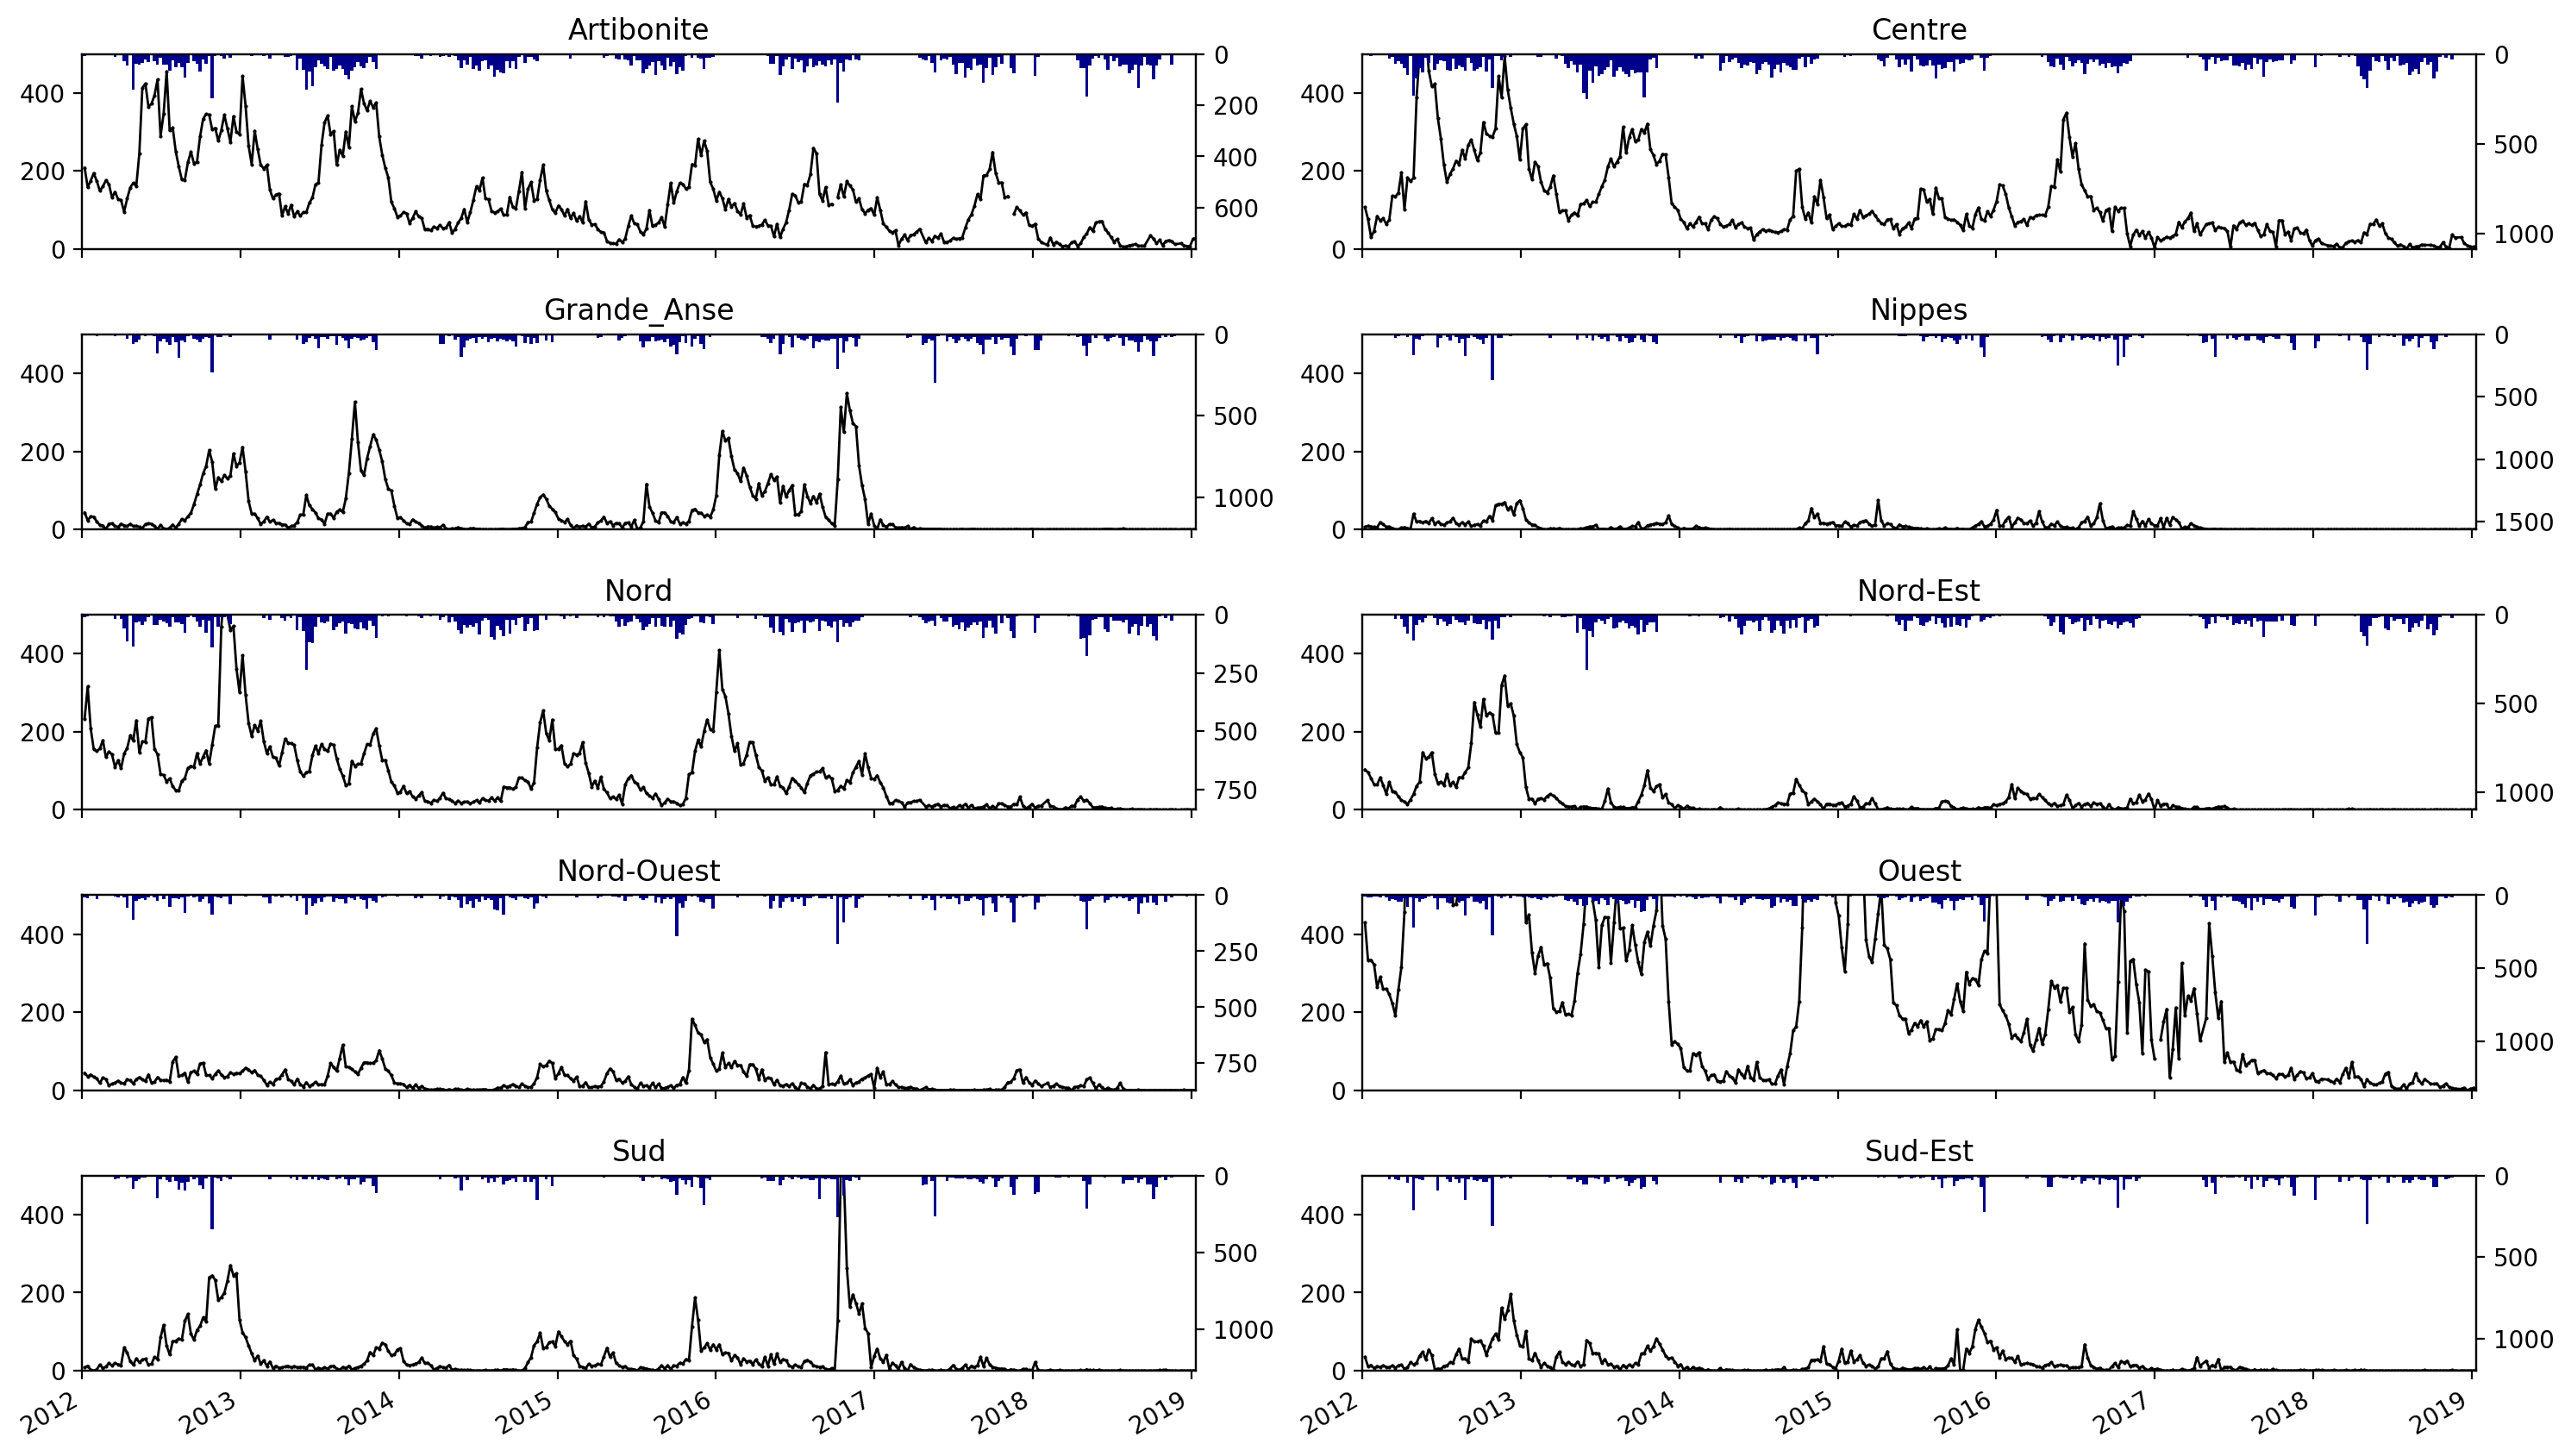

In [5]:
ti = datetime.date(2012,1,1)#input_parameters['t_start']
tf = input_parameters['t_end']

fig, axes = plt.subplots(5, 2, figsize=(15,10), squeeze = True, dpi = 200);
fig.patch.set_facecolor('white')
axes = axes.flatten();
for i, dp in enumerate(cases.columns):

    axt =  axes[i].twinx()
    axes[i].plot(cases[dp][ti:tf], marker='.', linestyle='-',color='k', linewidth=1, markersize=1 ) 
    axt.bar(pd.date_range(ti,tf, freq='W-SAT').date, rain[dp].resample('W-SAT').sum()[ti:tf], 
    label = r'Rainfall', color = 'darkblue', width=7, alpha = 1)

    axes[i].set_title(dp)
    axes[i].set_ylim(0, 500)
    axt.set_ylim(4*max(rain[dp].resample('W-SAT').sum()[t_start:t_for]),0) # check if only reverse y
    axes[i].set_xlim(ti, tf)
    #axes[i].legend()
    axes[i]
    
fig.tight_layout()
fig.autofmt_xdate()


### All departements

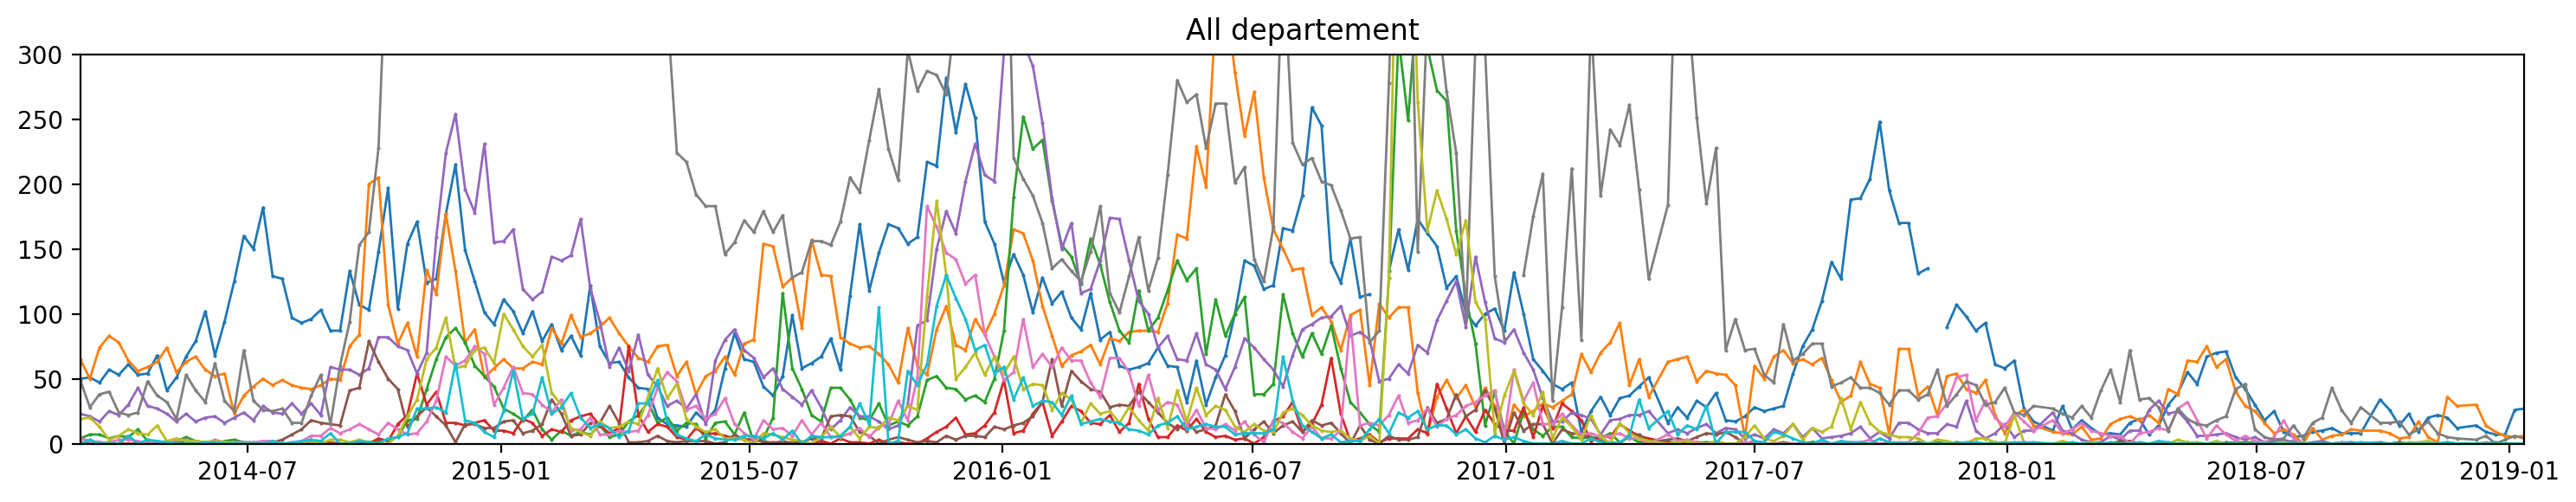

In [7]:
ti = input_parameters['t_start']
tf = input_parameters['t_end']

fig, axes = plt.subplots(1, 1, figsize=(15,3), squeeze = True, dpi = 200);
fig.patch.set_facecolor('white')
for i, dp in enumerate(cases.columns):

    axes.plot(cases[dp][t_start:][ti:tf], marker='.', linestyle='-', linewidth=1, markersize=1, label=dp ) 

    axes.set_title('All departement')
    axes.set_xlim(ti, tf)
    axes.set_ylim(0, 300)
    
    
fig.tight_layout()

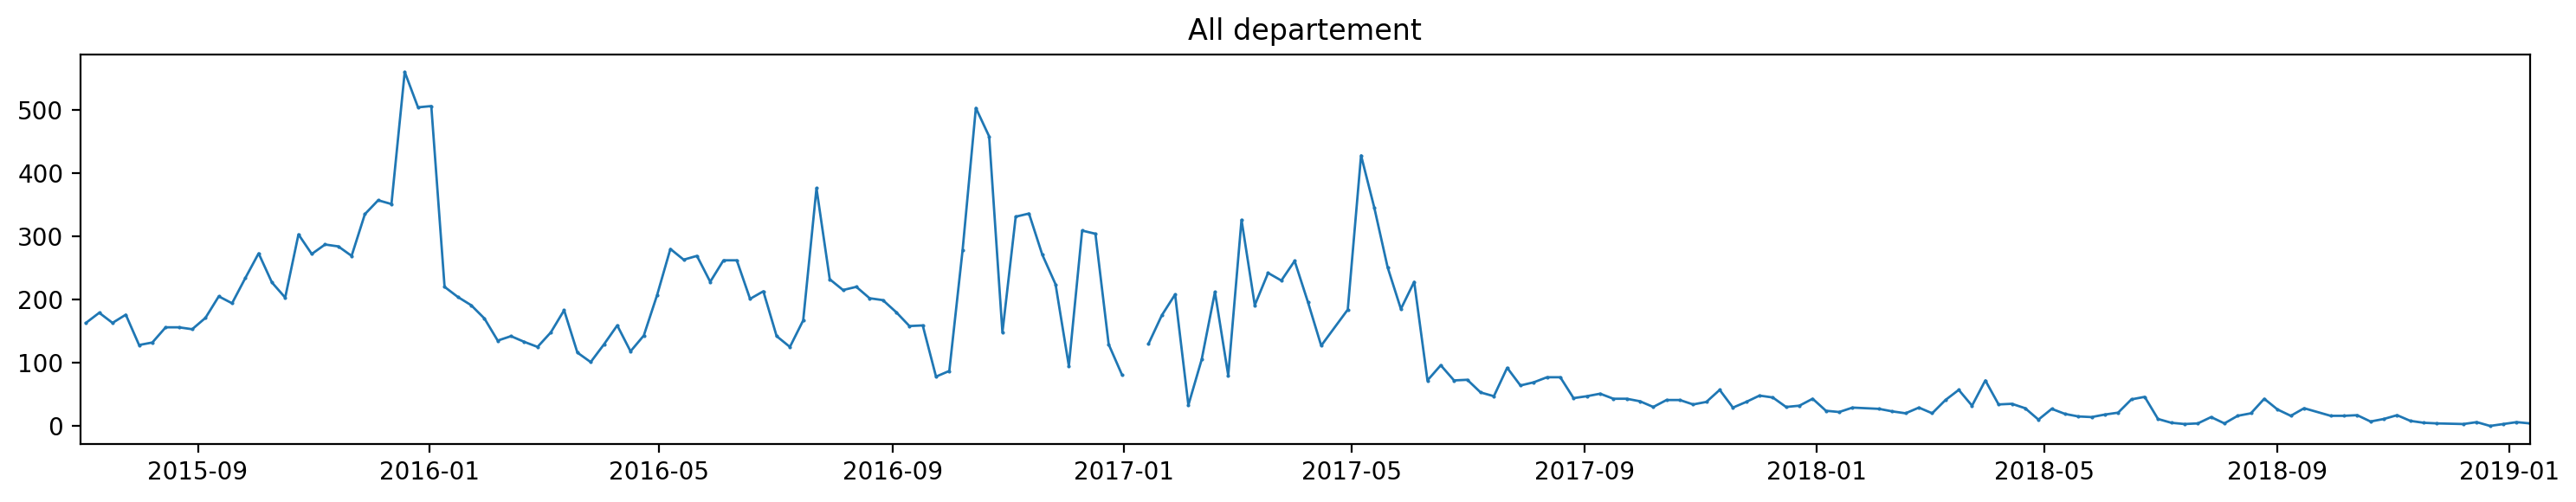

In [3]:
ti = datetime.date(2015,7,1)
tf = input_parameters['t_end']

fig, axes = plt.subplots(1, 1, figsize=(15,3), squeeze = True, dpi = 200);
fig.patch.set_facecolor('white')

axes.plot(cases['Ouest'][t_start:][ti:tf], marker='.', linestyle='-', linewidth=1, markersize=1, label='Ouest' ) 

axes.set_title('All departement')
axes.set_xlim(ti, tf)
    
    
fig.tight_layout()

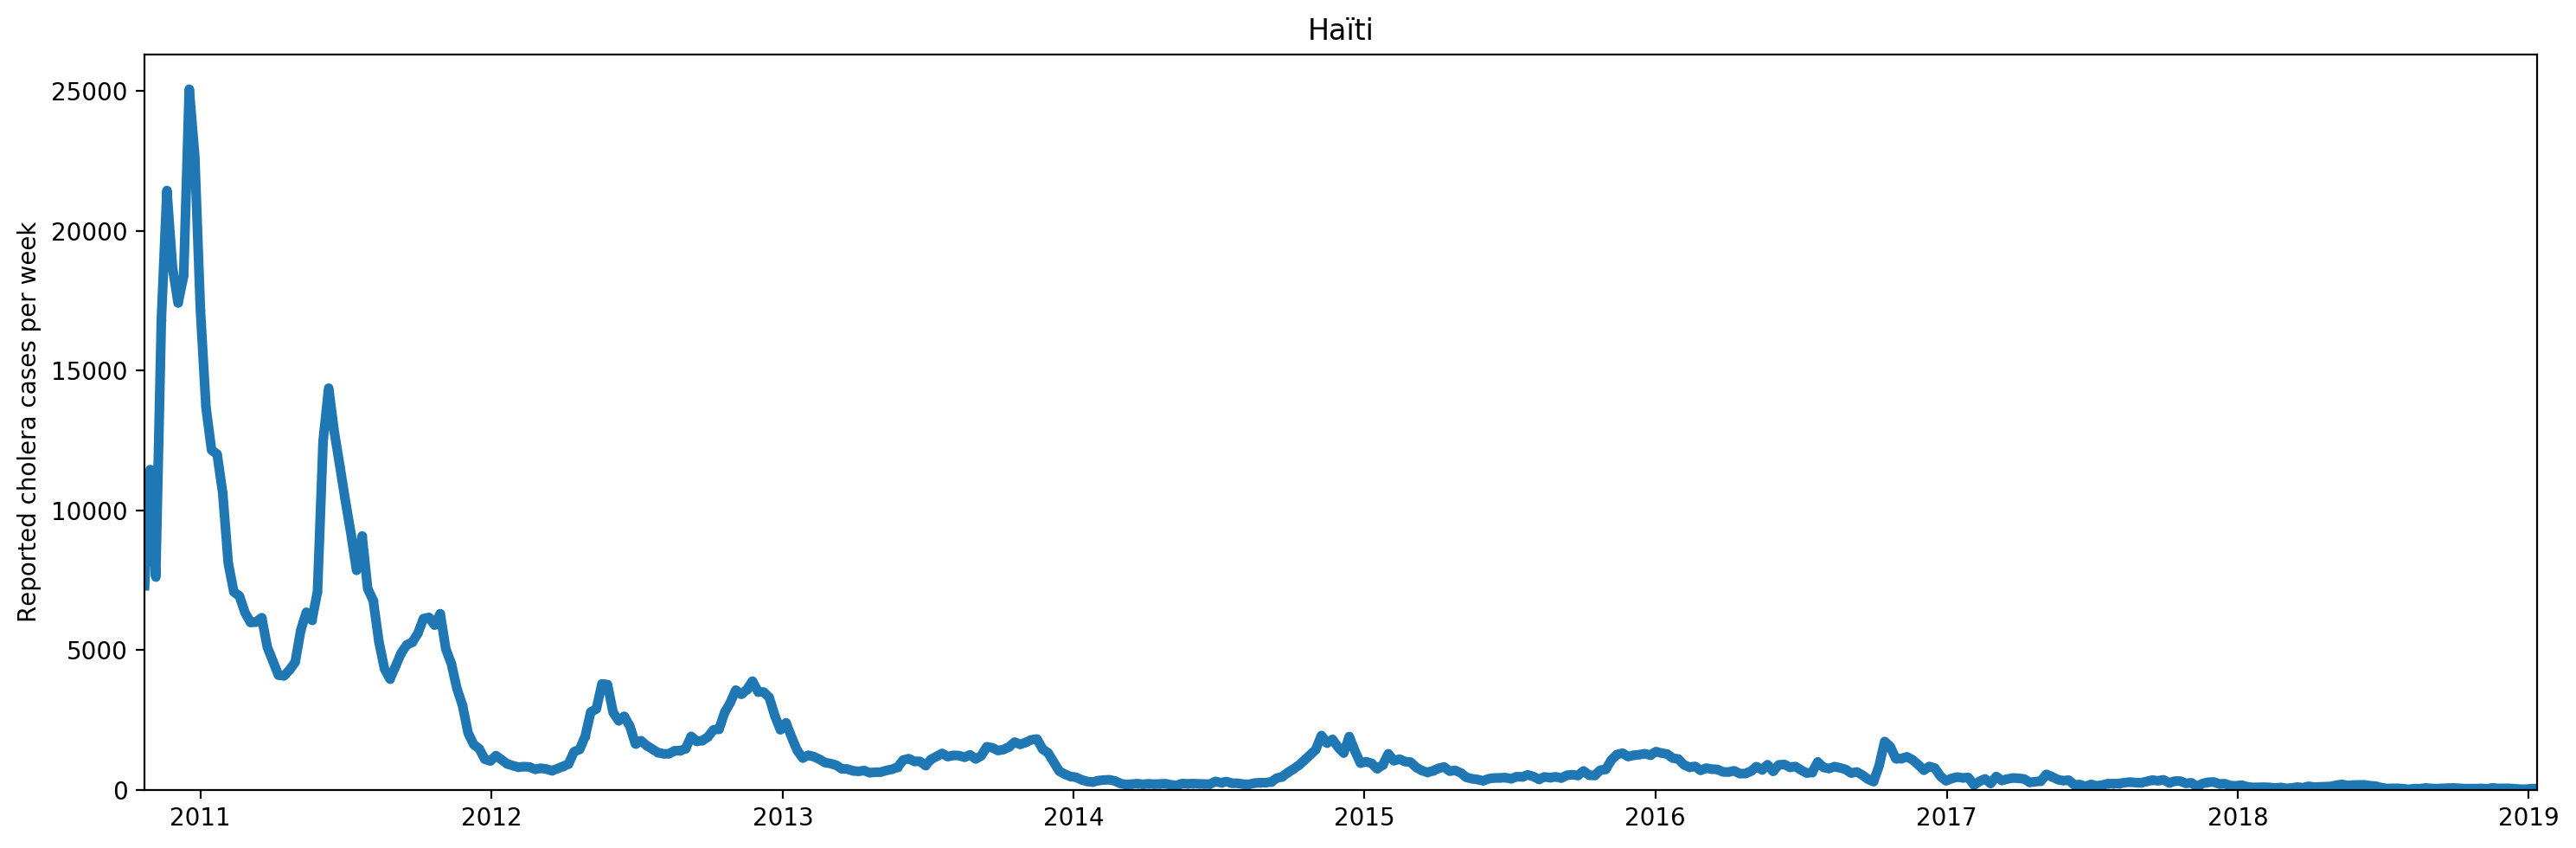

In [25]:
ti = datetime.date(2010,10,23)
tf = input_parameters['t_end']

fig, axes = plt.subplots(1, 1, figsize=(15,5), squeeze = True, dpi = 200);
fig.patch.set_facecolor('white')

axes.plot(cases.sum(axis=1)[ti:tf], marker='.', linestyle='-', linewidth=4, markersize=5) 

axes.set_title('Haïti')
axes.set_xlim(ti, tf)
axes.set_ylim(0)
axes.set_ylabel('Reported cholera cases per week')


    
    
fig.tight_layout()



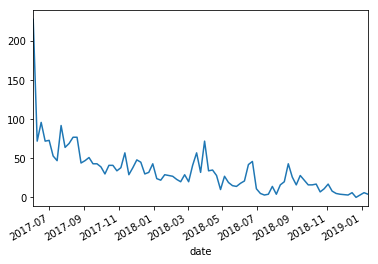

In [17]:
cases['Ouest'][datetime.date(2017,6,1):tf].plot()

In [11]:
ti = datetime.date(2012,1,1)#input_parameters['t_start']
tf = input_parameters['t_end']

In [18]:
cases['Ouest'][datetime.date(2017,6,1):tf]

date
2017-06-03    228.0
2017-06-10     72.0
2017-06-17     96.0
2017-06-24     72.0
2017-07-01     73.0
2017-07-08     53.0
2017-07-15     47.0
2017-07-22     92.0
2017-07-29     64.0
2017-08-05     69.0
2017-08-12     77.0
2017-08-19     77.0
2017-08-26     44.0
2017-09-02     47.0
2017-09-09     51.0
2017-09-16     43.0
2017-09-23     43.0
2017-09-30     39.0
2017-10-07     30.0
2017-10-14     41.0
2017-10-21     41.0
2017-10-28     34.0
2017-11-04     38.0
2017-11-11     57.0
2017-11-18     29.0
2017-11-25     38.0
2017-12-02     48.0
2017-12-09     45.0
2017-12-16     30.0
2017-12-23     32.0
              ...  
2018-06-09     21.0
2018-06-16     42.0
2018-06-23     46.0
2018-06-30     11.0
2018-07-07      5.0
2018-07-14      3.0
2018-07-21      4.0
2018-07-28     14.0
2018-08-04      4.0
2018-08-11     16.0
2018-08-18     20.0
2018-08-25     43.0
2018-09-01     26.0
2018-09-08     16.0
2018-09-15     28.0
2018-09-29     16.0
2018-10-06     16.0
2018-10-13     17.0
2018-10-20     

In [3]:
cases

,Artibonite,Centre,Grande_Anse,Nippes,Nord,Nord-Est,Nord-Ouest,Ouest,Sud,Sud-Est
date,,,,,,,,,,
2010-10-23,6234.0,507,0,0,17,0,2,540,0,0
2010-10-30,7603.0,1245,0,0,145,0,518,1938,0,4
2010-11-06,4835.0,811,0,1,437,0,819,713,0,2
2010-11-13,8589.0,1247,0,0,1400,6,2243,3312,11,1
2010-11-20,7097.0,1750,25,10,2830,82,2592,7000,44,9
2010-11-27,5025.0,1460,143,24,4134,134,2241,5383,123,26
2010-12-04,3763.0,1442,668,37,3161,350,2005,5674,261,55
2010-12-11,2451.0,1385,1553,96,3037,470,1634,6733,533,494
2010-12-18,2429.0,1861,2703,251,3304,1445,1604,9777,1475,215
